In [13]:
import numpy as np # Basic python numeric library
import control as ctrl # Control systems library
import matplotlib.pyplot as plt # Python plots library
%matplotlib inline

# Exercise 1:

Consider the following transfer function:

\begin{align}
    T(s) &= \dfrac{s}{(s+4)(s+8)}
\end{align}

* Find the impulse response of the system
* Find the ramp response of the system

## Solution

__Impulse Response__

First, we know that as impulse we mean the Dirac's Delta function, $\delta(t)$. A simple computation implies that

\begin{align}
    \mathcal{L}\{\delta\}(s) &= \int_{0}^{\infty}e^{-st}\delta(t)dt\\
                             &= e^{-s\cdot 0} = 1
\end{align}

Thus, the laplace transform of $\delta$ is 1. Moreover, we can express our output as:

\begin{align}
    T(s) &= \dfrac{Y(s)}{U(s)}\\
    Y(s) &= U(s)T(s)
\end{align}

Being $u(t) = \delta(t)$, $U(s) = 1$, and thus $Y(s) = T(s)$. Applying the inverse laplace transform:

\begin{align}
    y(t) &= \mathcal{L}^{-1}\biggr\{\dfrac{s}{(s+4)(s+8)} \biggr\}
\end{align}

In order to solve this later equation, we need to expand it in partial fractions, that is:

\begin{align}
    \dfrac{s}{(s+4)(s+8)} &= \biggr(\dfrac{A}{s+4} + \dfrac{B}{s+8}\biggr)\\
                          &= \biggr(\dfrac{(A+B)s + (8A + 4B)}{(s+4)(s+8)}\biggr)
\end{align}

From these, we conclude that:

\begin{align}
    1A + 1B &= 1\\
    8A + 4B &= 0
\end{align}

Which has as solution $(A,B) = (-1,2)$, therefore:

\begin{align}
    y(t) &= \mathcal{L}^{-1}\biggr\{\dfrac{2}{s+8} + \dfrac{1}{s+4}\biggr\}\\
         &= 2\mathcal{L}^{-1}\biggr\{\dfrac{1}{s+8}\biggr\} - \mathcal{L}^{-1}\biggr\{\dfrac{1}{s+4}\biggr\}\\
         &= 2e^{-8t} - e^{-4t}
\end{align}

__Ramp Response__

If $u(t)$ is a ramp, $u(t) = t\theta(t)$, where $\theta(t)$ is the step function. Thus:

\begin{align}
    U(s) &= \int_{-\infty}^{+\infty}te^{-st}u(t)dt\\
         &= \int_{0}^{\infty}te^{-st}dt\\
         &= -\dfrac{t}{s}e^{-st}\biggr|_{t = 0}^{t = \infty} + \dfrac{1}{s}\int_{0}^{\infty}e^{-st}dt\\
         &= \dfrac{1}{s}\int_{0}^{\infty}e^{-st}dt\\
         &= \dfrac{1}{s^{2}}
\end{align}

Where from the second to the third equation we have used integration by parts with $u = t, dv = e^{-st}dt$. Therefore, we can again use this to compute our output:

\begin{align}
    y(t) &= \mathcal{L}^{-1}\biggr\{\dfrac{1}{s^{2}}\dfrac{s}{(s+4)(s+8)}\biggr\}\\
         &= \mathcal{L}^{-1}\biggr\{\dfrac{1}{s(s+4)(s+8)}\biggr\}\\
         &= \dfrac{1}{32}\mathcal{L}^{-1}\biggr\{\dfrac{1}{s}\biggr\} + \dfrac{1}{32}\mathcal{L}^{-1}\biggr\{\dfrac{1}{s+8}\biggr\} - \dfrac{1}{16}\mathcal{L}^{-1}\biggr\{\dfrac{1}{s+4}\biggr\}\\
         &= \dfrac{1}{32}\biggr(1 + e^{-8t} - 2e^{-4t} \biggr)
\end{align}

_Remark:_ take a close look into those two examples, and pay attention in how our decomposition managed to separate the roots of the polynomial $\xi(s) = s(s+4)(s+8)$, namely, the poles of the system. Can you generalize this results for a output whose frequency representation is $Y(s) = \biggr(\prod_{i=1}^{n}(s+p_{n}) \biggr)^{-1}$?

## Verifying the answers

We start by plotting our analytical answers, that is,

In [14]:
## Analytical answers
t = np.arange(0,10,0.1)
y_impulse = (2*np.exp(-8*t) - np.exp(-4*t))
y_ramp = (1/32)*(1 + np.exp(-8*t) - 2*np.exp(-4*t))

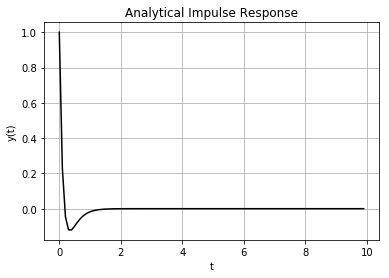

In [15]:
plt.figure()
plt.title('Analytical Impulse Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,y_impulse,'k-')
plt.grid()

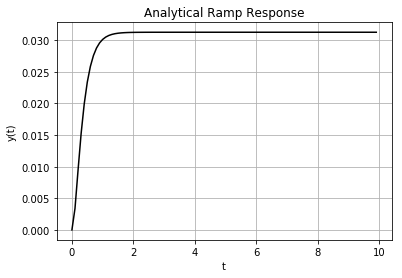

In [16]:
plt.figure()
plt.title('Analytical Ramp Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,y_ramp,'k-')
plt.grid()

Now, we use the control library in order to display how we can easily simulate frequency responses.

In [17]:
Tnum = [1, 0]
Tden = [1, 12, 32]
T = ctrl.tf(Tnum,Tden)
print(T)


       s
---------------
s^2 + 12 s + 32



__Remark:__ we have expanded (s+4)(s+8) into $s^{2} + 12s + 32$. Here, we have represented the transfer function with help of our library. To simulate how the system reacts to an impulse function,

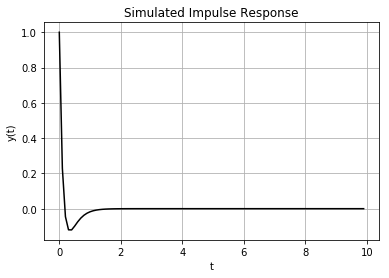

In [18]:
(_,impulse_y,) = ctrl.impulse_response(T, T = t)

plt.figure()
plt.title('Simulated Impulse Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,impulse_y,'k-')
plt.grid()

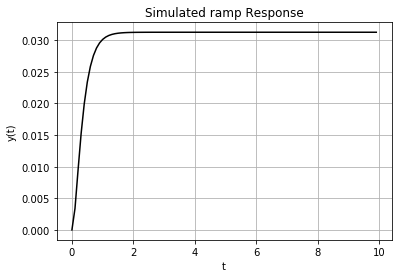

In [19]:
(_,ramp_y,_) = ctrl.forced_response(T, T = t, U = t)

plt.figure()
plt.title('Simulated ramp Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,ramp_y,'k-')
plt.grid()

As you can see, both approaches yields the same results.

# Exercise 2:

Transform the following transfer functions into differential equations:

* a. $G(s) = \dfrac{7}{s^{2}+5s+10}$
* b. $G(s) = \dfrac{15}{(s+10)(s+10)}$
* c. $G(s) = \dfrac{s+3}{s^{3} + 11s^{2} + 12s + 18}$

Reminding that each $G(s) = \dfrac{Y(s)}{U(s)}$,

__Transfer Function a.__

\begin{align}
    (s^{2}+5s+10)Y(s) &= 7U(s)\\
    s^{2}Y(s) + 5sY(s) + 10Y(s) &= 7U(s)\\
    \mathcal{L}^{-1}\{s^{2}Y(s) + 5sY(s) + 10Y(s)\} &= 7u(t)\\
    \mathcal{L}^{-1}\{s^{2}Y(s)\} + 5\mathcal{L}^{-1}\{sY(s)\} + 10\mathcal{L}^{-1}\{Y(s)\} &= 7u(t)\\
    \ddot{y}(t) + 5\dot{y}(t) + 10y(t) &= 7u(t)
\end{align}

__Transfer Function b.__

\begin{align}
    \mathcal{L}^{-1}\{(s+10)(s+10)Y(s)\} &= 15u(t)\\
    \mathcal{L}^{-1}\{(s^{2}+20s+100)Y(s)\} &= 15u(t)\\
    \ddot{y} + 20\dot{y} + 100y &= 15u
\end{align}

__Transfer Function c.__

\begin{align}
    \mathcal{L}^{-1}\{(s^{3} + 11s^{2} + 12s + 18)\}Y(s) &= \mathcal{L}^{-1}\{(s+3)U(s)\}\\
    \dddot{y} + 11\ddot{y} + 12\dot{y} + 18 &= \dot{u} + 3u
\end{align}

# Exercise 3

Considering the following ODE:

\begin{align}
    2\ddot{y} + 6\dot{y} + 4y &= \dot{u} + 3u\\
    2s^{2}Y(s) - sy(0) - \dot{y}(0) + 6sY(s) - 6y(0) + 4Y(s) &= sU(s) + 3U(s)
\end{align}

being $y(0) = 2, \dot{y}(0) = 1$, we have:

\begin{align}
    2s^{2}Y(s) - 2s - 1 + 6sY(s) - 6 + 4Y(s) &= sU(s) + 3U(s)\\
    Y(s)\{2s^{2} + 6s + 4\} &= 2s + 1 + sU(s) + 3U(s)\\
    Y(s) &= \dfrac{2s + 1 + sU(s) + 3U(s)}{2s^{2} + 6s + 4}
\end{align}

__Free Response__

The free-response implies $u(t) = 0 \rightarrow U(s) = 0$. So:

\begin{align}
    Y(s) &= 2\dfrac{s + \dfrac{1}{2}}{(s+1)(s+2)}\\
         &= \dfrac{3}{s+2} - \dfrac{1}{s+1}
\end{align}

thus,

\begin{align}
    y(t) &= 3e^{-2t} - e^{-st}
\end{align}

__Forced Response__

Considering as input $u(t) = 12e^{-4t}\delta(t)$, its laplace transform is:

\begin{align}
    U(s) &= \int_{0}^{\infty}12e^{-4t}e^{-st}\delta(t)dt\\
         &= \dfrac{12}{s+4}
\end{align}

Reapplying this to the $Y(s)$ expression:

\begin{align}
    Y(s) &= \dfrac{13s + 37}{(s+4)(2s^{2}+6s+4)}\\
         &= \dfrac{1}{2}\dfrac{13s + 37}{(s+4)(s+2)(s+1)}\\
         &= \dfrac{1}{4}\biggr(\dfrac{16}{s+1} - \dfrac{11}{s+2} - \dfrac{5}{s+4}\biggr)
\end{align}

Therefore, we conclude that $y(t) = \dfrac{1}{4}\biggr(16e^{-t} - 11e^{-2t} - 5e^{-4t} \biggr)$

In [20]:
y_zero = 3*np.exp(-2*t) - np.exp(-t)
y_forced = (16*np.exp(-t) - 11*np.exp(-2*t) - 5*np.exp(-4*t))/4

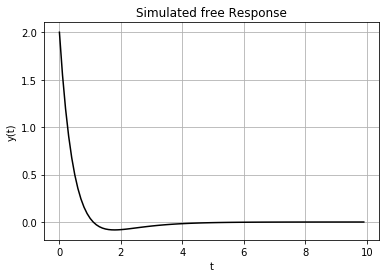

In [21]:
plt.figure()
plt.title('Simulated free Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,y_zero,'k-')
plt.grid()

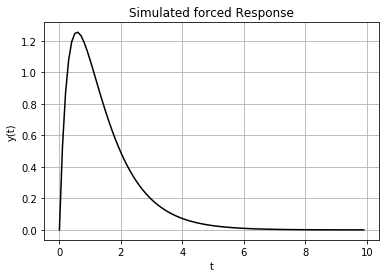

In [22]:
plt.figure()
plt.title('Simulated forced Response')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,y_forced,'k-')
plt.grid()